# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

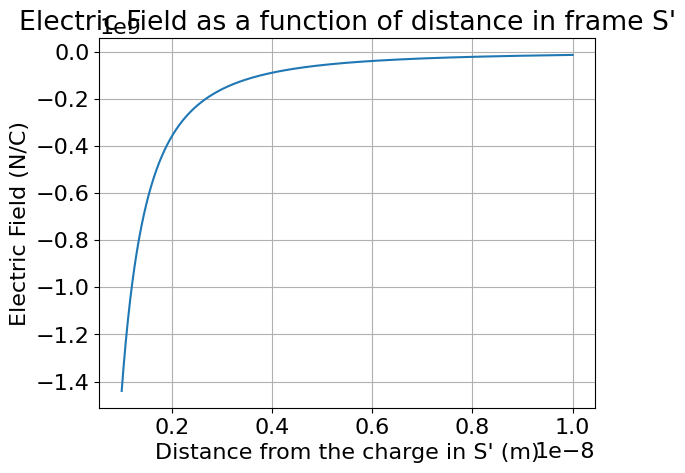

In [22]:
# Constants
k = 8.9875e9  # Coulomb's constant in N m^2/C^2
q = -1.602e-19  # Charge of an electron in Coulombs

# Function to calculate electric field
def electric_field(r):
    return k * q / (r ** 2)

# Distance range
distances = np.linspace(1e-9, 1e-8, 1000)  # Define a range of distances from 0 to 1 meter

# Calculate electric field at each distance
electric_fields = electric_field(distances)

# Plotting
plt.plot(distances, electric_fields)
plt.xlabel('Distance from the charge in S\' (m)')
plt.ylabel('Electric Field (N/C)')
plt.title('Electric Field as a function of distance in frame S\'')
plt.grid(True)
plt.show()

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

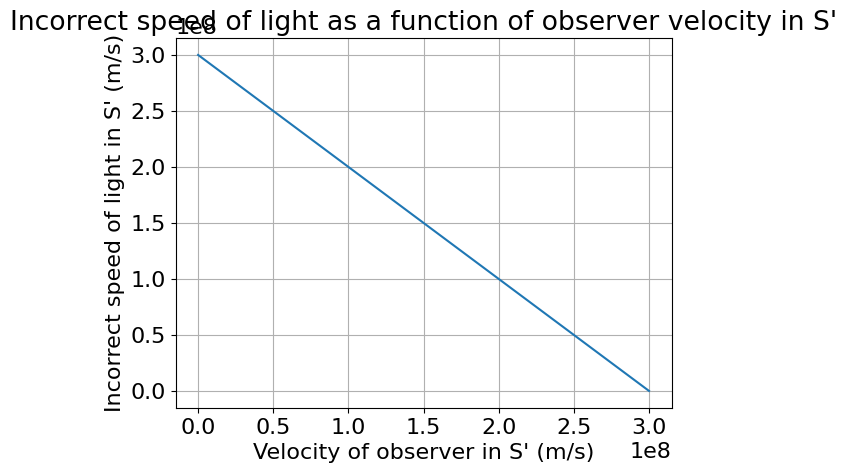

In [23]:
# Constants
c = 3e8  # Speed of light in vacuum in m/s

# Function to calculate incorrect speed of light according to Galilean transformation
def speed_of_light_galilean(v):
    return c - v

# Velocity range
velocities = np.linspace(0, 3e8, 1000)  # Range of velocities from 0 to the speed of light

# Calculate incorrect speed of light at each velocity
speeds_of_light = speed_of_light_galilean(velocities)

# Plotting
plt.plot(velocities, speeds_of_light)
plt.xlabel('Velocity of observer in S\' (m/s)')
plt.ylabel('Incorrect speed of light in S\' (m/s)')
plt.title('Incorrect speed of light as a function of observer velocity in S\'')
plt.grid(True)
plt.show()

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

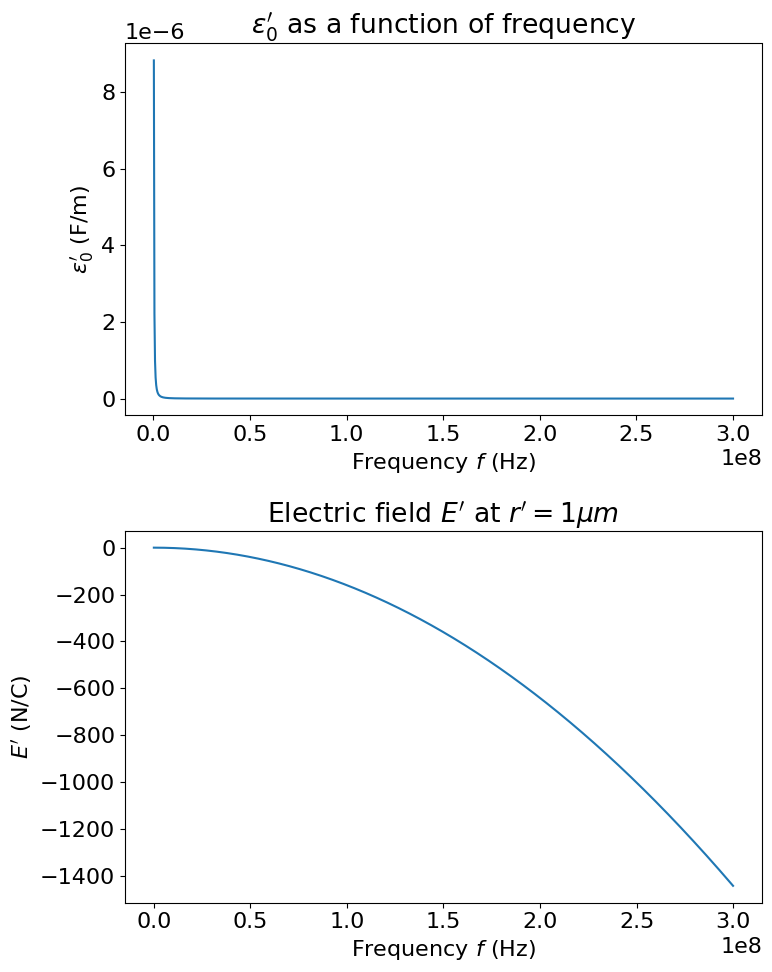

In [24]:
# Constants
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability of free space in N/A^2
mu_0_prime = mu_0  # Assume mu_0 = mu_0' 

# Function to calculate epsilon_0_prime as a function of f
def epsilon_0_prime(f):
    c = 1 / np.sqrt(mu_0)  # Speed of light in vacuum
    c_prime = f  # Speed of light in frame S'
    return 1 / (mu_0 * c_prime**2)

# Function to calculate electric field E' at r' = 1e-6 m as a function of f
def electric_field_prime(f, q):
    r_prime = 1e-6  # Distance at which electric field is calculated in meters
    epsilon_0_prime_val = epsilon_0_prime(f)
    return q / (4 * np.pi * epsilon_0_prime_val * r_prime**2)

# Frequency range
frequencies = np.linspace(0, 3e8, 1000)  # Range of frequencies from 0 to the speed of light

# Calculate epsilon_0_prime at each frequency
epsilons = epsilon_0_prime(frequencies)

# Calculate electric field at r' = 1e-6 m and q = -1.602e-19 (charge of an electron)
electric_fields = electric_field_prime(frequencies, -1.602e-19)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Top subplot: epsilon_0_prime as a function of frequency
axs[0].plot(frequencies, epsilons)
axs[0].set_xlabel('Frequency $f$ (Hz)')
axs[0].set_ylabel('$\epsilon_0^{\prime}$ (F/m)')
axs[0].set_title('$\epsilon_0^{\prime}$ as a function of frequency')

# Bottom subplot: electric field E' at r' = 1e-6 m as a function of frequency
axs[1].plot(frequencies, electric_fields)
axs[1].set_xlabel('Frequency $f$ (Hz)')
axs[1].set_ylabel('$E^{\prime}$ (N/C)')
axs[1].set_title('Electric field $E^{\prime}$ at $r^{\prime} = 1 \mu m$')

# Adjust layout
plt.tight_layout()
plt.show()

<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

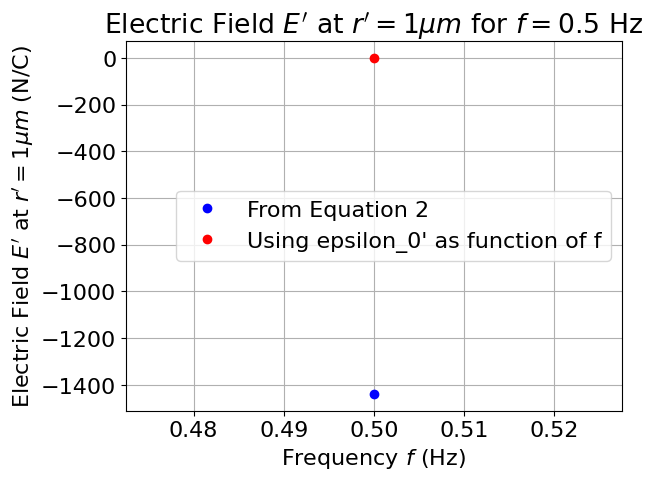

In [25]:
# Constants
k = 8.9875e9  # Coulomb's constant in N m^2/C^2
q = -1.602e-19  # Charge of an electron in Coulombs
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability of free space in N/A^2

# Function to calculate electric field E' at r' = 1e-6 m using Equation 2
def electric_field_equation_2(r_prime):
    return k * q / (r_prime ** 2)

# Function to calculate epsilon_0_prime as a function of f
def epsilon_0_prime(f):
    c = 1 / np.sqrt(mu_0)  # Speed of light in vacuum
    c_prime = f  # Speed of light in frame S'
    return 1 / (mu_0 * c_prime**2)

# Function to calculate electric field E' at r' = 1e-6 m as a function of f
def electric_field_prime(f, q):
    r_prime = 1e-6  # Distance at which electric field is calculated in meters
    epsilon_0_prime_val = epsilon_0_prime(f)
    return q / (4 * np.pi * epsilon_0_prime_val * r_prime**2)

# Frequency
f = 0.5  # Hz

# Calculate electric field at r' = 1e-6 m using Equation 2
electric_field_eq2 = electric_field_equation_2(1e-6)

# Calculate electric field at r' = 1e-6 m using epsilon_0' as a function of f
electric_field_prime_f_dependent = electric_field_prime(f, q)

# Plotting
plt.plot(f, electric_field_eq2, 'bo', label='From Equation 2')
plt.plot(f, electric_field_prime_f_dependent, 'ro', label='Using epsilon_0\' as function of f')
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel('Electric Field $E\'$ at $r\' = 1 \mu m$ (N/C)')
plt.title('Electric Field $E\'$ at $r\' = 1 \mu m$ for $f = 0.5$ Hz')
plt.legend()
plt.grid(True)
plt.show()

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

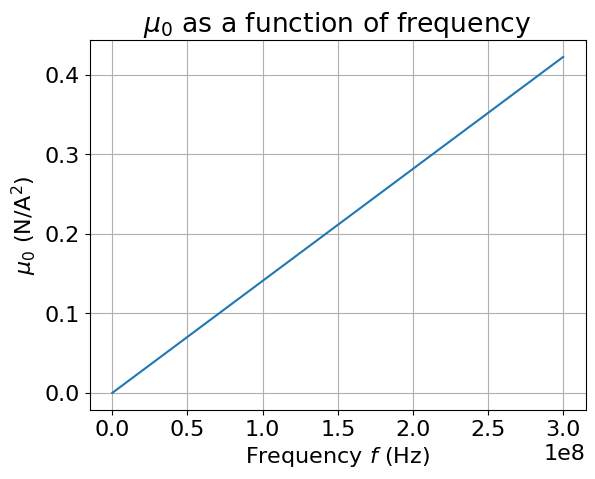

In [26]:
# Constants
mu_0 = 4 * np.pi * 1e-7  # Magnetic permeability of free space in N/A^2
I = 1  # Current in Amperes
R = 1  # Radius of the loop in meters

# Function to calculate mu_0_prime as a function of f
def mu_0_prime(f):
    c = 1 / np.sqrt(mu_0)  # Speed of light in vacuum
    c_prime = f  # Speed of light in frame S'
    return mu_0 * (c_prime / c)

# Frequency range
frequencies = np.linspace(0, 3e8, 1000)  # Range of frequencies from 0 to the speed of light

# Calculate mu_0_prime at each frequency
mu_0_values = mu_0_prime(frequencies)

# Plotting
plt.plot(frequencies, mu_0_values)
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel('$\mu_0$ (N/A$^2$)')
plt.title('$\mu_0$ as a function of frequency')
plt.grid(True)
plt.show()

<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

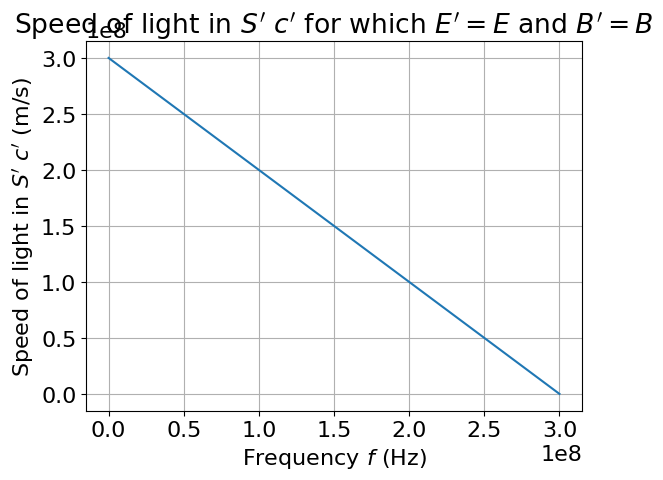

In [27]:
# Constants
c = 3e8  # Speed of light in vacuum in m/s

# Function to calculate c' using the Galilean transformation
def calculate_c_prime(f):
    return c - f

# Frequency range
frequencies = np.linspace(0, 3e8, 1000)  # Range of frequencies from 0 to the speed of light

# Calculate c' for each frequency
c_primes = calculate_c_prime(frequencies)

# Plotting
plt.plot(frequencies, c_primes)
plt.xlabel('Frequency $f$ (Hz)')
plt.ylabel('Speed of light in $S\'$ $c^{\prime}$ (m/s)')
plt.title('Speed of light in $S\'$ $c^{\prime}$ for which $E^{\prime} = E$ and $B^{\prime} = B$')
plt.grid(True)
plt.show()

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.